## Data Visualization of SMesh nodes

Visualize data from SMesh Build v1.0 nodes, data gathered on 10/20/24 in Lab64

Authors: Lisa Fung

Last Updated: 10/26/2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Mount Google Drive to import data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
folderpath = '/content/drive/Shared drives/SMesh: Sustainability Radio Sensor Networks/smesh-software/Data Visualization/4x_v1.0_nodes_1x_logger/'
data = {}
logger = "62e4"
sensor_types = ["device_metrics", "bme688", "ina260", "pmsa003i"]
for sensor in sensor_types:
  data[sensor] = pd.read_csv(folderpath + logger + "_" + sensor + ".csv")

### INA 260 Visualization

In [5]:
# Add column names for INA260 data
row0 = data['ina260'].columns.tolist()
data['ina260'].columns = ['Time', 'Node', 'Voltage', 'Current']
data['ina260'] = pd.concat([pd.DataFrame([pd.Series(row0, index=data['ina260'].columns)]), data['ina260']], ignore_index=True)

In [6]:
data['ina260']['Time'] = pd.to_datetime(data['ina260']['Time'])

In [7]:
data['ina260'].head()

,Time,Node,Voltage,Current
0,2024-10-08 14:25:03.905429,0x336918e8,13.1125,1.25
1,2024-10-08 14:26:03.940613,0x336918e8,13.1775,NaN
2,2024-10-08 14:27:04.809683,0x336918e8,13.11,NaN
3,2024-10-08 14:28:04.206719,0x336918e8,13.17875,-1.25
4,2024-10-08 14:29:05.370522,0x336918e8,13.115,1.25


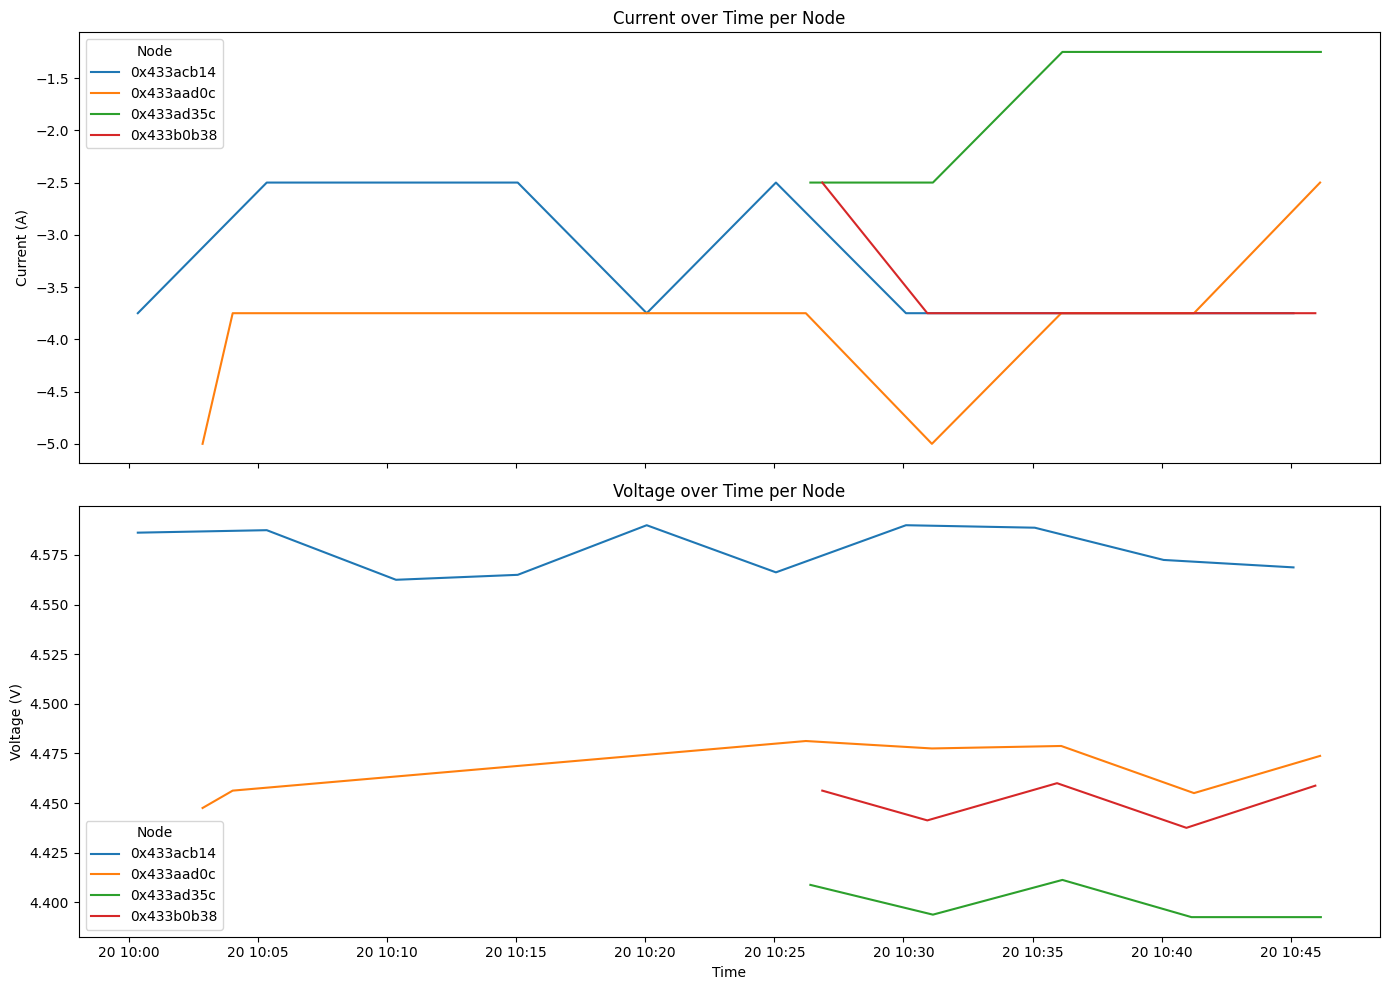

In [8]:
# Plot INA260 values over time for 10/20/24

# Filter for 10/20/24 data
data_ina260 = data['ina260'][data['ina260']['Time'].dt.date == pd.to_datetime('2024-10-20').date()]

# Plot current and voltage over time for each node
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plt.title("Current and Voltage Over Time of 4x v1.0 Nodes on 2024-10-20")

# Plot current over time
sns.lineplot(data=data_ina260, x='Time', y='Current', hue='Node', ax=axs[0])
axs[0].set_title('Current over Time per Node')
axs[0].set_ylabel('Current (A)')

# Plot voltage over time
sns.lineplot(data=data_ina260, x='Time', y='Voltage', hue='Node', ax=axs[1])
axs[1].set_title('Voltage over Time per Node')
axs[1].set_ylabel('Voltage (V)')
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.show()


### Temperature Visualization

In [9]:
data['bme680']

KeyError: 'bme680'